In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Problem Setting

On a Stormy Day in Berkeley the extreme weather is putting the grid at risk. Each hour the weather has a 40% chance of putting the grid in a damaged state. While damaged, a repair crew will be dispatched which will repair the damage with a probability of 80% each hour, (and with 20% probability they will need to continue their work). While fully functioning, the grid generates \$100,000 in profit. While inoperational, you must pay \$1000 an hour to your repair crew.


# Model the system as a Markov Reward Process

Recall a markov reward is a tuple $(\mathcal{S},\mathcal{P},\mathcal{R},\gamma)$ where

$\mathcal{S}$ is a set of states

$\mathcal{P}$ is a state transition probability matrix

$\mathcal{R}$ is a reward function $\mathcal{R}_s = \mathbb{E}[\mathcal{r}_{t+1}|S_t=s] $ 

$\gamma$ is a discount function

How many states are there? What are they?

Write the transition probability matrix

In [4]:
P = np.array([[0.6,0.4],[0.4,0.6]])

Define the reward

In [5]:
R = np.array([[100],[-1]])

Choose a discount factor

In [6]:
gamma = 0.9

#Simulate the system

In [7]:
def SimMarkovRewardProcess(N,P,R,X0):
  #Simulates the markov Reward process
  #N =  Number of steps
  #P = Transition Probability Matrix
  #R = State Rewards
  #X0 = initial state
  Rout = [R[X0]] #Save Reward
  Xout = [X0] #save State
  X = X0 #Current State
  rng = np.random.default_rng(seed=None)
  for i in range(N):
    X = rng.choice(np.arange(0,P.shape[0],1),p = P[X,:])
    Rout.append(R[X])
    Xout.append(X)
    
  return np.array(Xout), np.array(Rout)

Use the above function to calculate the total reward for a 24 hour period (start in the undamaged state)

In [8]:
Xt,Rt = SimMarkovRewardProcess(23,P,R,0)
Totalreward = sum(Rt)
print(Totalreward)

[1390]


#Compute the value function
Calculate the value function by solving the discounted bellman equation

In [9]:
v = np.linalg.inv(np.eye(len(R)) - gamma*P) @ R
print(v)

[[556.58536585]
 [433.41463415]]


How does the value function change if we make the twice as resilient to failure?

In [10]:
P1 = np.array([[0.8,0.2],[0.4,0.6]])
v = np.linalg.inv(np.eye(len(R)) - gamma*P1) @ R
print(v)

[[715.9375]
 [558.125 ]]


How about if we make it twice as easy to repair?

In [11]:
P2 = np.array([[0.6,0.4],[0.7,0.3]])
v = np.linalg.inv(np.eye(len(R)) - gamma*P2) @ R
print(v)

[[666.42201835]
 [573.76146789]]


What  if your repair crew costs twice as much?


In [12]:
R1 = np.array([[100],[-2]])
v = np.linalg.inv(np.eye(len(R)) - gamma*P) @ R1
print(v)

[[552.19512195]
 [427.80487805]]


#Case Study
Say you are interested in making your grid more resilient, Make a plot of the probability of failure vs the reward generated over the course of a 48 hour storm

In [13]:
Rewards = []
Pfailure = np.linspace(0,1,30)
Pf = np.array([[0.6,0.4],[0.4,0.6]])
for p in Pfailure:
  Pf[0,0] = 1-p
  Pf[0,1] = p
  Xt,Rt = SimMarkovRewardProcess(47,Pf,R,0)
  Rewards.append(sum(Rt))

Text(0, 0.5, 'Reward')

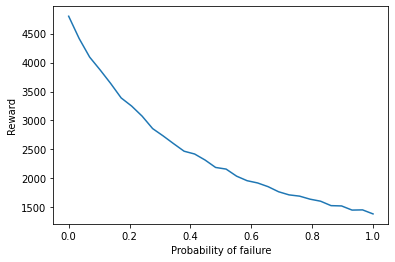

In [31]:
plt.plot(Pfailure,Rewards)
plt.xlabel("Probability of failure")
plt.ylabel("Reward")

Your result may be a bit noisy. Why is that and how might you try to make it less noisy?

Text(0, 0.5, 'Reward')

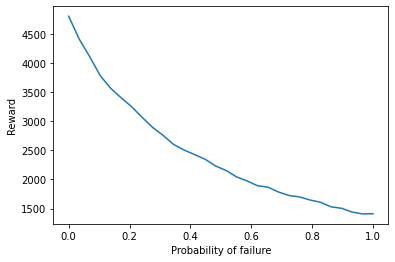

In [32]:
Rewards = []
Nsim = 200
Pfailure = np.linspace(0,1,30)
Pf = np.array([[0.6,0.4],[0.4,0.6]])
for p in Pfailure:
  rew = []
  for h in range(Nsim):
    Pf[0,0] = 1-p
    Pf[0,1] = p
    Xt,Rt = SimMarkovRewardProcess(47,Pf,R,0)
    rew.append(sum(Rt))
  Rewards.append(np.mean(np.array(rew)))

plt.plot(Pfailure,Rewards)
plt.xlabel("Probability of failure")
plt.ylabel("Reward")

You can also plot the value function

Text(0, 0.5, 'Value Function')

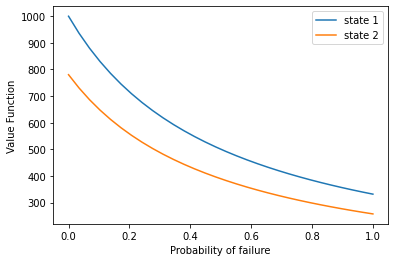

In [36]:
Vs = []
Nsim = 200
Pfailure = np.linspace(0,1,30)
Pf = np.array([[0.6,0.4],[0.4,0.6]])
for p in Pfailure:
  Pf[0,0] = 1-p
  Pf[0,1] = p
  vi = np.linalg.inv(np.eye(len(R)) - gamma*Pf) @ R
  Vs.append(vi)


Vplot = np.array(Vs)
plt.plot(Pfailure,Vplot[:,0],label='state 1')
plt.plot(Pfailure,Vplot[:,1],label='state 2')
plt.legend()
plt.xlabel("Probability of failure")
plt.ylabel("Value Function")

#plot discount factor plot

In [ ]:
gams = np.linspace(0.9,1,5)
kplot = np.arange(1,100,1)
for gam in gams:
  plt.plot(kplot,np.power(gam,kplot),label = gam)
plt.legend()
plt.xlabel("time step")
plt.ylabel("gamma^k")